In [ ]:
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import os.path as osp
import pickle
from random import shuffle
import matplotlib.pyplot as plt
from utils import *
import student_code_12011404 as sc
categories = ['Kitchen', 'Store', 'Bedroom', 'LivingRoom', 'Office', 'Industrial', 'Suburb',
              'InsideCity', 'TallBuilding', 'Street', 'Highway', 'OpenCountry', 'Coast',
              'Mountain', 'Forest'];
abbr_categories = ['Kit', 'Sto', 'Bed', 'Liv', 'Off', 'Ind', 'Sub',
                   'Cty', 'Bld', 'St', 'HW', 'OC', 'Cst',
                   'Mnt', 'For'];
num_train_per_cat = 100
data_path = osp.join('..', 'data')
train_image_paths, test_image_paths, train_labels, test_labels = get_image_paths(data_path,
                                                                                 categories,
                                                                                 num_train_per_cat)

In [ ]:
def evaluate_model(X_train, y_train, vocab_size=100,  kfold = 5):
    # 用整个train数据集建立词表
    vocab = sc.c_build_vocabulary_parrallel(X_train, vocab_size)
    block_size = len(X_train)//kfold
    # 分出验证集
    # tr = trange(kfold)
    accuracies = []
    feats = sc.c_get_bags_of_sifts(X_train, '', step=5, threads=32, vocab=vocab)
    for i in range(kfold):
        # 用词表建立训练集的特征
        X_train_features = np.concatenate((feats[:i*block_size], feats[(i+1)*block_size:]), axis=0)
        y_train_labels = np.concatenate((y_train[:i*block_size],y_train[(i+1)*block_size:]), axis=0)
        X_val_features = feats[i*block_size:(i+1)*block_size]
        y_val_labels = y_train[i*block_size:(i+1)*block_size]
        # 训练模型 验证模型
        y_val_labels_pred = sc.c_svm_classify(X_train_features, y_train_labels, X_val_features)
        acc = np.mean(y_val_labels == y_val_labels_pred)
        # tr.set_description(f"kfold: {i}, acc: {acc}")
        print(f"kfold: {i}, acc: {acc}")
        accuracies.append(acc)
    return np.mean(accuracies)

In [ ]:
import random

random.shuffle(train_image_paths)
random.shuffle(train_image_paths)

100%|██████████| 12/12 [00:00<00:00, 98.84it/s] 


kfold: 0, acc: 0.016


100%|██████████| 12/12 [00:00<00:00, 103.26it/s]


kfold: 1, acc: 0.02666666666666667


100%|██████████| 12/12 [00:00<00:00, 70.30it/s]


kfold: 2, acc: 0.058666666666666666


100%|██████████| 12/12 [00:00<00:00, 76.09it/s]


kfold: 3, acc: 0.06933333333333333


100%|██████████| 12/12 [00:00<00:00, 42.30it/s]


kfold: 0, acc: 0.010666666666666666


100%|██████████| 12/12 [00:00<00:00, 35.82it/s]


kfold: 1, acc: 0.042666666666666665


100%|██████████| 12/12 [00:00<00:00, 33.08it/s]


kfold: 2, acc: 0.058666666666666666


100%|██████████| 12/12 [00:00<00:00, 29.93it/s]


kfold: 3, acc: 0.056


100%|██████████| 12/12 [00:00<00:00, 15.10it/s]


kfold: 0, acc: 0.008


100%|██████████| 12/12 [00:00<00:00, 12.16it/s]


kfold: 1, acc: 0.034666666666666665


100%|██████████| 12/12 [00:01<00:00, 10.33it/s]


kfold: 2, acc: 0.058666666666666666


100%|██████████| 12/12 [00:01<00:00, 10.61it/s]


kfold: 3, acc: 0.08


100%|██████████| 12/12 [00:01<00:00, 10.88it/s]


kfold: 0, acc: 0.008


100%|██████████| 12/12 [00:01<00:00,  7.98it/s]


kfold: 1, acc: 0.05333333333333334


100%|██████████| 12/12 [00:01<00:00,  7.14it/s]


kfold: 2, acc: 0.06933333333333333


100%|██████████| 12/12 [00:01<00:00,  7.31it/s]


kfold: 3, acc: 0.08533333333333333


100%|██████████| 12/12 [00:01<00:00,  8.95it/s]


kfold: 0, acc: 0.005333333333333333


100%|██████████| 12/12 [00:01<00:00, 10.09it/s]


kfold: 1, acc: 0.042666666666666665


100%|██████████| 12/12 [00:01<00:00,  6.07it/s]


kfold: 2, acc: 0.04533333333333334


100%|██████████| 12/12 [00:02<00:00,  5.30it/s]


kfold: 3, acc: 0.072


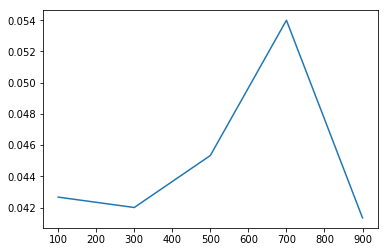

In [31]:
vocab_sizes = range(100,1001, 200)
accs = []
N = len(train_image_paths)
for vocab_size in vocab_sizes:
    accs.append(evaluate_model( train_image_paths[:N], train_labels[:N], vocab_size=vocab_size,  kfold = 4))
plt.plot(vocab_sizes, accs)

In [24]:
accuracies

NameError: name 'accuracies' is not defined